In [34]:
! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [36]:
# function to use barplot


def barplot(df, x=None, y=None, hue=None ,title='Default',):
    plt.figure(figsize=(15, 5))
    fig = sns.barplot(data=df, x=x, y=y, hue=hue)
    fig.set_xticklabels(fig.get_xticklabels(), fontsize=7)
    fig.set_title(title)

# function to use countplot


def countplot(x, hue=None, title='Default',):
    plt.figure(figsize=(15, 5))
    fig = sns.countplot( x=x, hue=hue,)
    fig.set_xticklabels(fig.get_xticklabels(), fontsize=7)
    fig.set_title(title)

# function to use scatter

def scatter(df, dimensions=['age', 'income', 'loan']):
    fig = px.scatter_matrix(df,dimensions=['age', 'income', 'loan'] , color= 'default',)
    fig.show()

# grafico = px.scatter_matrix(base_credit, , color = 'default')
# grafico.show()

In [37]:
df = pd.read_csv('./datasets/credit_data.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


### Tratamento da base 

In [38]:
# Preencher os valores inconsistente manualmente
# Prencher a média
df.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [39]:
df['age'][df['age'] > 0].mean()

40.927700449097294

In [40]:
# Substituindo valores faltantes
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [41]:
df['age'].fillna(df['age'].mean(), inplace = True)

### Dividindo em previsores e classe

In [42]:
X_credit = df.iloc[:, 1:4].values
y_credit = df.iloc[:, 4].values

### Divisão em train e test

In [43]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [44]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Modelo Decision Tree

In [54]:
model = tree.DecisionTreeClassifier()
result = model.fit(X_credit_treinamento, y_credit_treinamento)

In [55]:
previsoes = model.predict(X_credit_teste)

In [62]:
features_name = ['income']
class_names = ['age']

In [63]:
dot_data = tree.export_graphviz(model, 
                  feature_names=features_name,
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 1 does not match number of features, 3

In [47]:
accuracy_score(y_credit_teste, previsoes)

0.984

In [48]:
confusion_matrix(y_credit_teste, previsoes)

array([[432,   4],
       [  4,  60]])

0.984

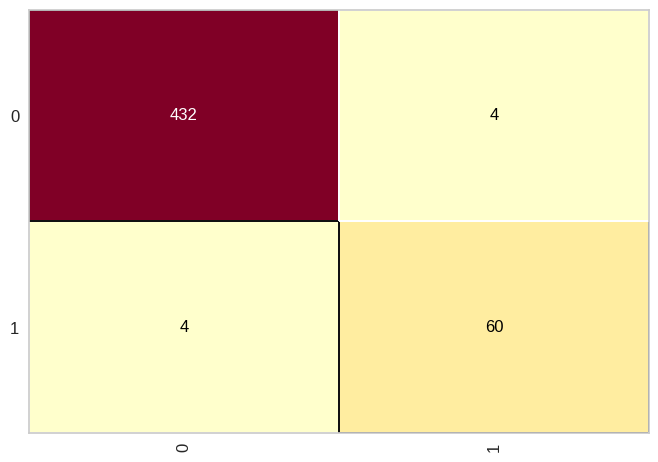

In [64]:
cm = ConfusionMatrix(model)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)